In [ ]:
pip install transformers

## Named entity recognition

In [3]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  f'`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="{aggregation_strategy}"` instead.'


[{'end': 18,
  'entity_group': 'PER',
  'score': 0.9981694,
  'start': 11,
  'word': 'Sylvain'},
 {'end': 45,
  'entity_group': 'ORG',
  'score': 0.9796019,
  'start': 33,
  'word': 'Hugging Face'},
 {'end': 57,
  'entity_group': 'LOC',
  'score': 0.9932106,
  'start': 49,
  'word': 'Brooklyn'}]

## Classification

In [7]:
classifier = pipeline("sentiment-analysis")
classifier("I was sad yesterday, but now I am happy.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998574256896973}]

In [8]:
classifier("I was happy yesterday, but now I am little sad.")

[{'label': 'NEGATIVE', 'score': 0.990756094455719}]

In [13]:
classifier(["now I am little sad.", "now I am very sad.", "now I am sad."])

[{'label': 'NEGATIVE', 'score': 0.9938516616821289},
 {'label': 'NEGATIVE', 'score': 0.999302864074707},
 {'label': 'NEGATIVE', 'score': 0.9987286925315857}]

In [5]:
classifier = pipeline("zero-shot-classification")
result = classifier("This is a course about the Transformers library", ['happy', 'sad'])

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [6]:
result

{'labels': ['happy', 'sad'],
 'scores': [0.6345352530479431, 0.3654647469520569],
 'sequence': 'This is a course about the Transformers library'}

## Text generation

In [14]:
generator = pipeline("text-generation")
generator("Now I am ready for the interview")

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Now I am ready for the interview about that. And then I ask if they want me to tell you. And now I want to tell you that the first place they put it – that is the first place where [the interview] is a lie'}]

In [15]:
generator = pipeline("text-generation", model="distilgpt2")
generator(
    "Now I am ready for the interview",
    max_length=30,
    num_return_sequences=2,
)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Now I am ready for the interview. If you are interested in seeing a new chapter, check out our chapter HERE.\nAdvertisements'},
 {'generated_text': 'Now I am ready for the interview I am sure this is going to be useful for anybody.\nAdvertisements'}]

## Mask filling

In [16]:
unmasker = pipeline("fill-mask")
unmasker("My <mask> is Nilavo Boral.", top_k=2)

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

[{'score': 0.7944905757904053,
  'sequence': 'My name is Nilavo Boral.',
  'token': 766,
  'token_str': ' name'},
 {'score': 0.027863094583153725,
  'sequence': 'My pseudonym is Nilavo Boral.',
  'token': 41093,
  'token_str': ' pseudonym'}]

## Question answering

In [18]:
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Nilavo and I work at Cloudcraftz in Kolkata.",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

{'answer': 'Cloudcraftz', 'end': 43, 'score': 0.696884036064148, 'start': 32}

## Summarization

In [19]:
summarizer = pipeline("summarization")
summarizer(
    """
    The app at https://share.streamlit.io/nilavoboral/laptop-price-predictor/main/price_predictor.py hasn't seen traffic in the past 5 days, so it will go to sleep on June 4, 2022 to help conserve resources. Once this happens, visitors will need to wake the app, which can take a minute or two.
Want to keep your app awake? Just visit it before June 4, 2022.
If you have any questions, please reply to this email or visit the Streamlit forums.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Your max_length is set to 142, but you input_length is only 125. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)


[{'summary_text': " The laptop price-predictor app hasn't seen traffic in the past 5 days . It will go to sleep on June 4, 2022 to help conserve resources . Once this happens, visitors will need to wake the app, which can take a minute or two . If you have any questions, please reply to this email or visit the Streamlit forums ."}]

## Translation

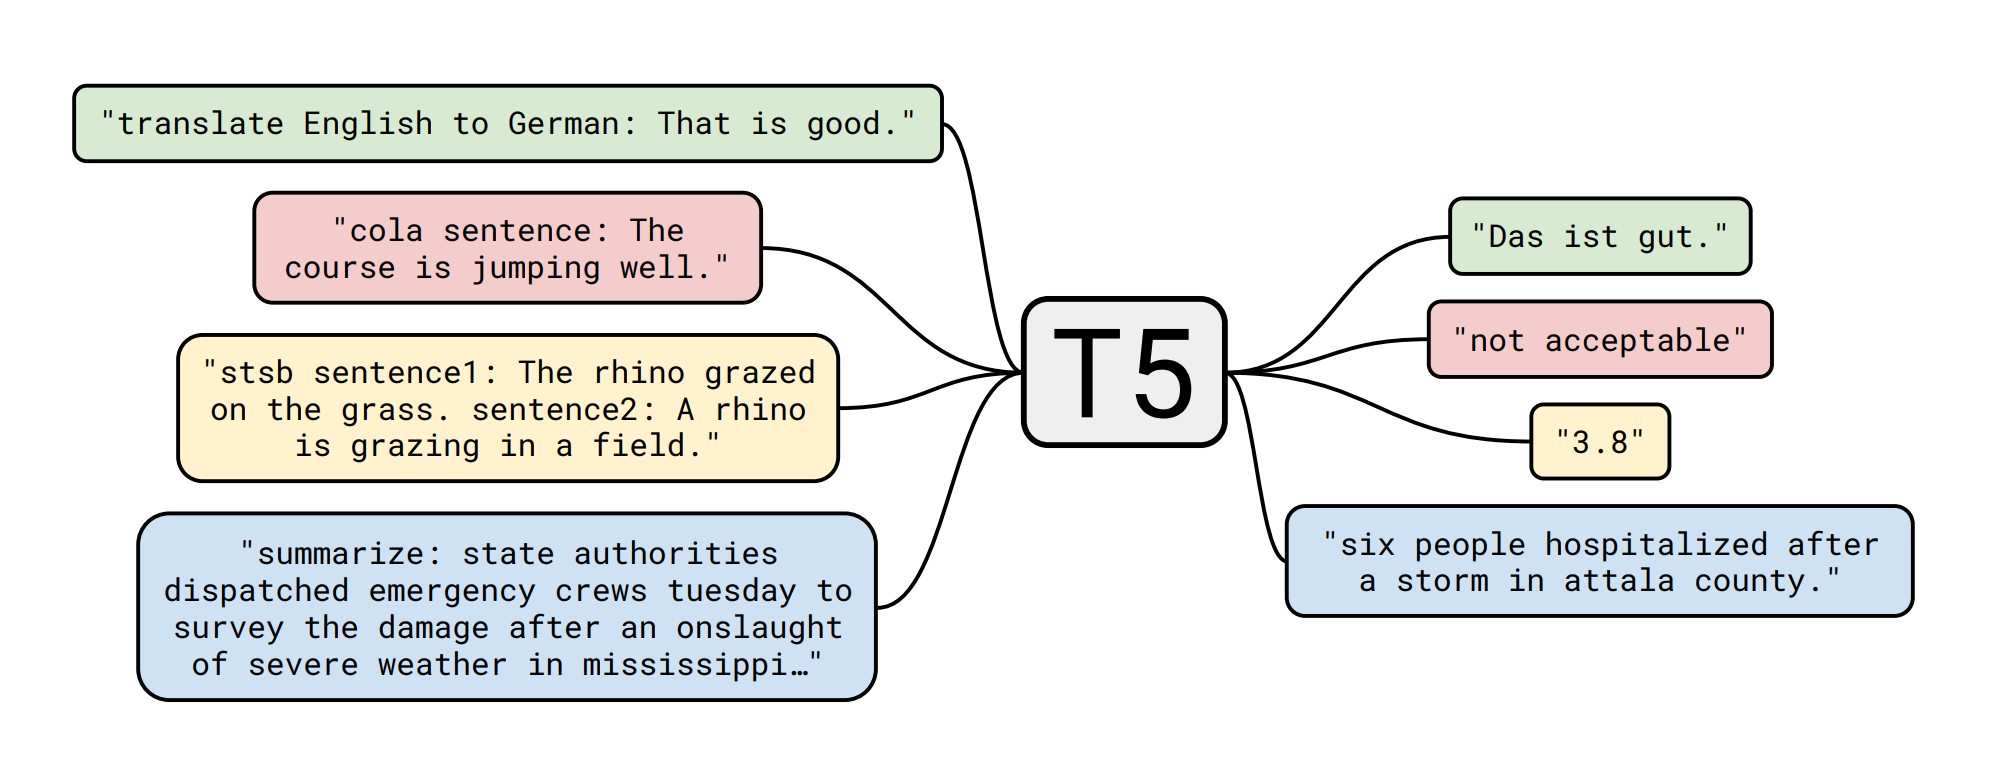

In [21]:
translator = pipeline("translation", model="t5-base")
translator("My name is Nilavo Boral")

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:161: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/__init__.py:654: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  UserWarning,


[{'translation_text': 'Mein Name ist Nilavo Boral'}]